<a href="https://colab.research.google.com/github/EricBojs/ME1316-Kompendium/blob/master/2-Bakgrund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Bakgrund

In [ ]:
# Installera Pandas som ger python möjlighet att läsa filer: .csv & .xlsx
!pip -q install pandas
# Installera yFinance som kopplar till kursdata från Yahoo Finance
!pip -q install yfinance
# Installera Matplotlib som låter oss rita diagram
!pip -q install matplotlib
# Bibliotek för att räkna med vektorer och liknande i python
!pip -q install numpy

In [ ]:
# Importera Matplotlib som låter oss rita grafer!
import matplotlib.pyplot as plt
# Så vi får upp diagrammen direkt i vår notebook
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi']= 100 # ställer in upplösning på diagram
plt.style.use('bmh')        # byter förinställt tema
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt 

## 2.1 Finansiella marknader
 
Förklaringar må skilja sig åt, men här presenterar vi *finansiella marknader* som platser där kontrakt mellan två parter köps och säljs. Enkla kontrakt speglar tillgångar, exempelvis är en **aktie** en rättighet på andel i ett bolag. Mer komplexa kontrakt bygger på underliggande kontrakt. Rättigheten att få köpa `10 USD` för `100 SEK` i framtiden är ett sådant. Alla kontrakt har ett *marknadspris*. Dock så skiljer sig priset över tid, så varje kontrakt omfattas av en risk för inblandade parter.


[*********************100%***********************]  1 of 1 completed


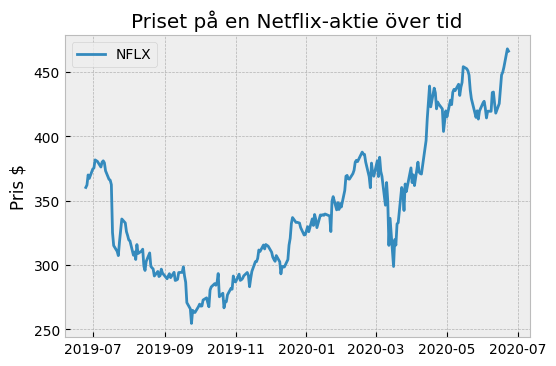

In [ ]:
data = yf.download('NFLX','2019-06-25','2020-06-24')    # Ladda hem aktiedata
plt.plot(data['Close'])                                 # Plotta slutpriser
plt.title("Priset på en Netflix-aktie över tid")        # Titel
plt.ylabel("Pris $")                                    # y-axel
plt.legend(["NFLX"])                                    # 
plt.show()

Som en följd av risken finns det finansiella tjänster för att aktörer på marknaden ska kunna *hedgea* (skydda) sig mot risk. Ska jag sälja dig mitt bolag i `USD` men föredrar `SEK` kan jag hedga mig genom att planera så att jag köper ett kontrakt som låser fast `USD`/`SEK`-kurser för framtiden så du inte råkar ut för en käftsmäll när dollarn faller i värde.

I väl fungerande finansiella marknader har parter tillgång till information och låga trösklar till att delta. Detta följer till att prissättningen som blir är lämpliga på sådant sätt att **arbitrage** inte förekommer, ingen part kan tjäna pengar riskfritt. En sådan marknad anses vara en *sensible market*

### 2.2.1 Efficient market hypothesis

För dig som läser Ayn Rands koserier kommer inte denna teori som någon större överraskning. *Efficient Market Hypothesis* är en teori som säger att marknadspriset speglar det sanna värdet på en tillgång, givet all tillgängliga informationen som finns att tillgå aktörer. I praktiken betyder det att marknadspriset matchar tillgångens riktiga värde. En investerare kommer med andra ord inte kunna “slå” marknaden då marknadskrafterna redan har all information tillgängligt och att tillgångspriset då justeras allteftersom. Med detta antagandet finns det inga “experter” i ordets rätta bemärkelse utan att slumpen styr hur aktier, och andra tillgångar, utvecklar sig. Om det var förutbestämt att priset skulle stiga skulle efterfrågan öka för att matcha den prisnivå som priset annars hade stigit till.

**Exempel**

Medicinteknikbolaget Fiktiv AB är börsnoterade på en efficient market och meddelar varje kvartal produktresultat för sina medicinska produkter. Detta medföljer att i snitt kommer resultatrapporten inte att höja, eller sänka, aktiepriset då denna information redan är inräknat i priset. I teorin kommer marknaden att underskatta och överskatta ny information i lika stor utsträckning och övertid kommer marknaden sätta ett förväntat pris utifrån den ackumulerade informationen.

Göran, som är produktchef på Fiktiv AB, sitter ensam på informationen om att företaget nyss har genomfört lyckade Covid-19-vaccinationer. Göran har nu arbritagemöjligheter att tjäna stora pengar på denna unika information. Finansmarknaden där medicinbolaget är noterat är inte längre en efficient market.

**Teorins begränsningar och antagande**

Denna marknadshypotes, och många andra finansiella matematiska modeller, utgår ifrån bland annat utifrån 3 viktiga antagande: 

1. Det finns inga arbritagemöjligheter på marknaden (finns inget sätt att tjäna en riskfri vinst). 
2. Marknaden värdera förluster/vinster lika (riskneutral).
3. Information är tillänglig för hela marknaden. 

Dessa 3 antagande är *knappast* helt sanna i en verklig kontext, men är *tillräckligt* sanna för att låta oss modellerar marknaden.

Ett Emma Frans-fan som har läst boken *Larmrapporten* vet att människor lider av kognitiv bias vid beslutfattande vilket får dem att agera irrationellt, till exempel **bekräftelsebias**. Detta är en del av den kritiken som har förts kring teorin om den effektiva marknaden. 

**Reflektionsfrågor**

1. Hur påverkar aktörers kognitiva bias marknaden och efficient market theoreom? 

2. Om nu market efficient hypothesis stämmer och att aktier styrs helt av slump och följer matematiken, varför har man då inte enbart automatiserade algoritmer som handlar?

### 2.2.2 Volatilitet

Volatiliteten är ett mått på kortsiktiga fluktuationer i priset på en finansiell tillgång. Med hög volatilitet fluktuerar priset mer och riskerar således att över tid drifta bort från det ursprungliga priset. Låg volatilitet gör att priset är stabilare, men aldrig helt riskfritt.


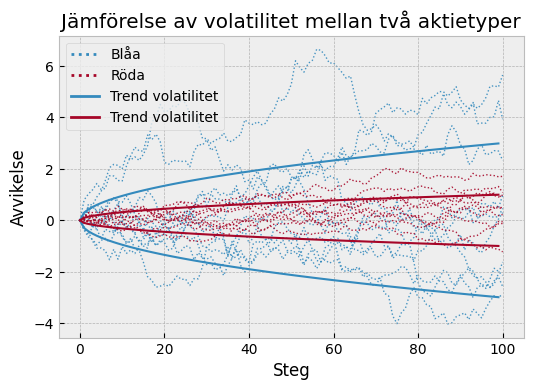

In [ ]:
# Standardavvikelser för risk/volatilitet
sig_x = 0.3 # hög för aktie X
sig_y = 0.1 # låg för aktie Y
# Slumpa 10 kurser i 100 steg 
for i in range(10):
  X,Y = [0], [0] # aktiekurser från start
  for j in range(100):
      X.append(np.random.normal(X[-1], sig_x))
      Y.append(np.random.normal(Y[-1], sig_y))
  plt.plot(X,':',color='#348ABD',linewidth=1.0,zorder=1,alpha=0.9)
  plt.plot(Y,':',color='#A60628',linewidth=1.0,zorder=2,alpha=0.9)
# Trendlinje
x_trend = [sig_x*np.sqrt(x) for x in range(100)]
y_trend = [sig_y*np.sqrt(y) for y in range(100)]
# Plots
plt.plot(x_trend,color=u'#348ABD',linewidth=1.5)
plt.plot([-x for x in x_trend],color=u'#348ABD',linewidth=1.5,)
plt.plot(y_trend,color=u'#A60628',linewidth=1.5)
plt.plot([-y for y in y_trend],color=u'#A60628',linewidth=1.5)    
# Diagram 
from  matplotlib.lines import Line2D

plt.legend(handles = [Line2D([],[], color='#348ABD',linestyle=':',label='Blåa'),
                      Line2D([],[], color='#A60628',linestyle=':',label='Röda'),
                      Line2D([],[], color='#348ABD',label='Trend volatilitet'), 
                      Line2D([],[], color='#A60628',label='Trend volatilitet')])
plt.ylabel("Avvikelse")
plt.xlabel("Steg")
plt.title("Jämförelse av volatilitet mellan två aktietyper")
plt.show()

`Blåa aktier`, som har en hög volatilitet fluktuerar mycket mer i pris, medan `Röda aktier` har lägre volatilitet och således lägre risk över tid.

### 2.2.3 Riskfri ränta


Det finns också sätt att förvara sina tillgångar utan risk. För dig och mig innebär det att stoppa madrassen full, för en storbank blir det svårare. Istället säljer Sveriges riksbank statsobligationer som ses som det enda riktigt riskfria alternativet, *om du tror på pappa staten*... Dessa har en avkastningsränta $r$, som beror på tidshorisont man binder sig till. Detta kallas ibland för reporänta.

Alla länders riksbanker har någon typ av statsobligation med en viss riskfri avkastning, men de kan skilja sig i hur obligationen är strukturerad.

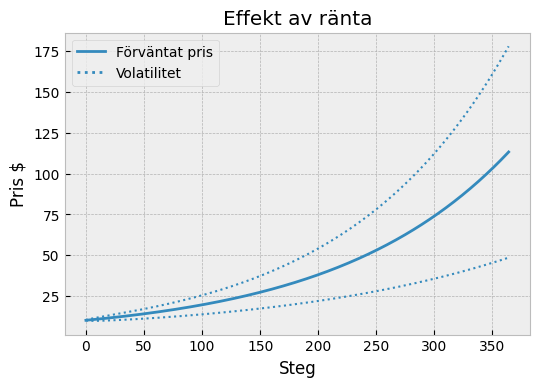

In [ ]:
sig_x = 0.3 # volatiliteten per steg
r = 0.2     # riskfriränta per 30:e steg
# Trendlinje (från känd formel)
plt.plot([10*np.exp(r*x/30) for x in np.arange(365)])   
# Volatilitet
x_trend = [sig_x*np.sqrt(x) for x in range(365)]
plt.plot([(10+x)*np.exp(r*i/30) for i,x in enumerate(x_trend)],':',
         color=u'#348ABD',linewidth=1.5)
plt.plot([(10-x)*np.exp(r*i/30) for i,x in enumerate(x_trend)],':',
         color=u'#348ABD',linewidth=1.5)
# Diagram 
plt.legend(handles = [Line2D([], [], color='#348ABD', marker='',
                             markersize=10, label='Förväntat pris'), 
                      Line2D([], [], color='#348ABD', marker='', linestyle=':',
                             markersize=10, label='Volatilitet')])
plt.xlabel("Steg")
plt.ylabel("Pris $")
plt.title("Effekt av ränta")
plt.show()

Ränteeffekten påverkar en finansiell tillgångs förväntade prisutveckling över tid.

### 2.2.4 Aktier 
Vi förstår att du säkert redan placerar hela ditt studielån oavkortat på ett ISK-konto hos Nordnet varje månad och lägger allt på det senaste du hör om i *Unga Aktiespararnas podcast* - så vi tänker inte förklara aktier mer än vad vi redan sagt: att det är ett kontrakt som säljs på en marknad.

Mer nämnvärt är dock en kort matematisk modellering av aktier som en stokastisk variabel $S$. Aktien har en förväntad avkastning $r$ som växer med tiden, $T$, samt en kortsiktig risk som mäts med varians $\sigma$ som också växer i med tiden.

$$E[S_T] = S_0e^{rT}$$
$$Var[S_T]= \sigma^2T.$$

Aktiepriset antas ofta en log-normal fördelning. Log-normal betyder att:

$$X \sim LN(\mu,\sigma) \Leftrightarrow \ln X \sim N( \mu, \sigma)$$

Känner du dig inte nöjd med med den här modelleringen? Bra, för som alla modeller så stämmer den inte! Men läs nästa kapitel om Matematisk modellering för att bli varse om en mer ingående matematisk modell, som har lite mindre fel.

### 2.2.5 Derivat

Någonting det är värt att skriva några längre meningar om är **derivat** (en: *derivatives*) som är ett samlingsord för de komplexa kontrakt som bygger på en underliggande aktie. Ett derivat är ett avtal mellan två parter som förbinder sig till någonting som väntas ske i framtiden. Vanliga derivat är *optioner* och *terminer* som förbinder parter till att handla finansiella produkter för ett bestämt pris en tid framöver. 

Den, troligtvist, vanligaste optionen är **European Call Option**. Optionen bygger på en underliggande aktie $S$, och ger köparen rätten att ett bestämt datum $T$ i framtiden köpa aktien för priset $K$. Det spännande är att man inte måste köpa aktien, utan bara gör en betalning idag för att få erbjudandet att köpa den i framtiden för ett förutbestämt pris. Vinsten för köparen är om priset på den underliggande aktien är mer värt än bestämda priset $K$, då köparen får aktien för under marknadsvärdet.  Om det avtalade priset överskrider det realiserade priset så finns det ingen mening att *utöva* kontraktet (eng: *exercise*) varpå derivatet är värdelöst.

Matematiskt kan vi beskriva European Call Option, $c$:

$$C(S_T,K)=\text{max}\{S_T-K,0\}$$

där max-funktionen gör att $c$ aldrig är negativ, och $S_T$ är aktiens pris vid slutdagen.

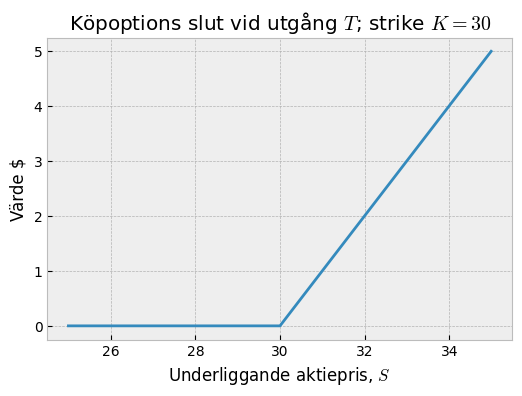

In [ ]:
S = 30.0          # Underliggande aktiepris
K = 30.0          # Strike
t = 0.5           # Löptid (år)
S_ = np.arange(25.0, 35.0, 0.01)   # vektor för x-axeln
# European Call Option-funktion
call_payoff = lambda S, K: np.maximum(S_ - K, 0.0)
# Diagram
plt.title('Köpoptions slut vid utgång $T$; strike $K = 30$')
plt.xlabel('Underliggande aktiepris, $S$')
plt.ylabel('Värde $')
plt.plot(S_, call_payoff(S_, K)) # plot(x,y)
plt.show()

Priset på på en European Call Option sätts av marknaden, men goda investerare har internat modeller bedömer vad ett rimligt marknadspris må vara.

### 2.2.6 Black-Scholes

Black-scholes är en modell som använder sig av statistisk prediktion som bygger på sannolikhetsteori med hjälp av antaganden om fördelningen och aktiens uppträder. Detta, för att få fram ett pris på *European call & put options* (sv: *köp-och säljoptioner*). Formeln är baserad på en matematisk modellering av aktier som stokastiska processer som har en drift $r$ och en volatilitet $\sigma$, där sigma följer en log-normal fördelning av aktieprisets utveckling. Modellen består av 5 variabler, varav 3  är varierande och 2 är okända. Dessa är: 

* $S$, dagens aktiepris 
* $K$ strike price (sv: lösenpris),
* $T$ time to maturity (sv: löptid)
* $r$ risk-free interest rate (Riskfriränta) 
* $\sigma$ volatility  (sv: volatilitet, standardavvikelsen av avkastningen). 

  
Vi ser Black-Scholes-modell som en funktion där aktie, strike och tid kan variera beroende på hur kontraktet läggs upp. Det okända är volatilitet och ränta. Funktionen ger det rättfärdiga priset på kontraktet European Call Option. Modellen utgår ifrån att efficent market theorem gäller.

$$ BS_{S, K, T}: \sigma \times r \rightarrow \text{pris} $$

*Reflektionsfråga* 

3. vilka begränsningar kan du se med Black scholes-modellen? 

## 2.2 Matematisk modellering $

Let's get mathecal!

### 2.2.1 Probability Space $

För att kunna greppa sannolikhet och förutspå framtiden är det viktigt att introducera en modellering som är flexibel och användbar. I detta kapitel kommer vi introducera $(\Omega,\mathcal{F}, P)$ kallat *Probability Space*, även känt som *Probability Triplet* som är en matematisk konstruktion för slumpmässiga processer.

1. $\Omega$ *sample space*, samling av alla möjliga utfall $w_i$.

$$\Omega = \{w_1, w_2,w_3,  …,\}$$

2. $\mathcal{F}$ *event space*, mängden möjliga kombinationer av möjliga utfall i sample space. Nämnt som power set. 

$$F = 2^\Omega$$ 

3. $P$ *probability function*, är den funktion som beskriver sannolikheten för olika, från 0 till 1, att event sker.

$$P: \mathcal{F} \rightarrow [0,1]$$

**Exempel**: Under helgen sitter Börshajen Hasse och gruvar sig över hans aktieinnehav av Fiktiv AB. När marknaden öppnar på måndag finns det två möjligheter: uppgång eller nedgång. Hans beskriver utfallsrummet som sådant att $\Omega = \{\text{Upp}, \text{Ned}\}$.
Event space $\mathcal{F} = \{\{\}, \{\text{Upp}\}, \{\text{Ned}\}, \{\text{Upp}, \text{Ned}\}\}$

Hasse är lite osäker på sannolikhetsfördelning, men är godtrogen om sin tur och tillskriver till sin modell: 

$$P(\text{Upp}) = 75\%$$
$$P(\text{Ned}) =25\%$$.


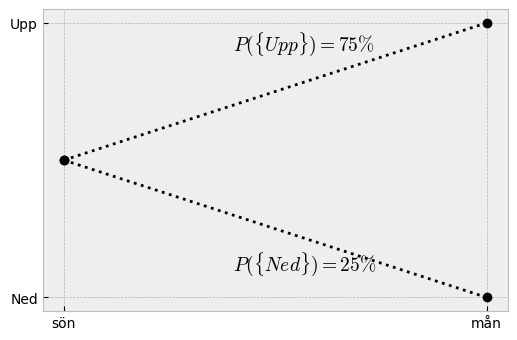

In [ ]:
tid = ['sön', 'mån']
plt.plot(tid,[0,1], ':',marker='o',color="black")
plt.plot(tid,[0,-1], ':',marker='o',color="black")
plt.yticks([-1,1],['Ned', 'Upp'])  # Set label locations.
plt.text(0.4, 0.8, "$P(\{Upp\})=75\%$", fontsize=14)
plt.text(0.4, -0.8, "$P(\{Ned\})=25\%$", fontsize=14)
plt.show()

### 2.2.2 Stochastic Process $

En *Stochastic Process* (sv: *stokastisk process*) beskriver värdet av en stokastisk variabel när denna övergår i olika tillstånd över diskret tid $t$, från $t=0$ upp till ett $t=T$. Det kan beskrivas matematiskt $\{S_n\}^T_{n=0}$ där en stokastisk variabel $S$ övergår mellan flera tillstånd $S_0, S_1, S_2 \dots $ över tid. 

$$\{S_n\}^T_{n=0}=\{S_0, S_1, S_2, \dots , S_T\}$$

För en aktie kan vi se slutpriset varje dag som stokastisk process. 
$\Omega$ blir alla möjliga utfall för hela kedjan. 
Det finns en drift $r$, samt en slumpmässighet: volatilitet $\sigma$

#### Exempel

För Börshajen Hans ser han halva veckans aktiepris som en stokastisk process av upp- och nedgångar. 

$$\{S_n\}^{\text{ons}}_{n=\text{mån}}=\{S_\text{mån}, S_\text{tis}, S_\text{ons}\}$$


Probability Space blir genast mycket mer komplex. 
Möjliga kombinationer $\Omega = \{\{U,U,U\}, \{U,U, N\}, \{U,N,U\} , … \{N,N,N\} \}$ totalt $2^3$ (!).


Vidare får vi ett ännu större eventrum $\mathcal{F}$ av power set $2^\Omega$. En mängd med totalt $2^{|2^\Omega |}$ kombinationer, alla med olika sannolikheter. Viktigt att notera är att $\{U, U, N\} \neq \{U, N, U\}$ även om de i slutändan faller på samma pris - de ska ses som två olika utfall.


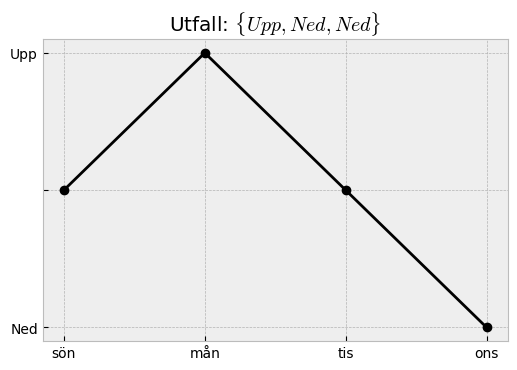

In [ ]:
plt.plot(['sön','mån','tis','ons'],[0,1,0,-1], marker='o',color="black")
plt.yticks([-1,0,1],['Ned','', 'Upp'])  # ändra y-axelns ticks.
plt.title("Utfall: $\{Upp,Ned,Ned\}$")
plt.show()

### 2.2.3 Filtration $

En filtration över en Probability Space $(\Omega, \mathcal{F}, P)$ är en grupp av mängder ${\mathcal{F}_t : t \geq 0}$ som är delmängder till $\mathcal{F}$ på så vis att $\mathcal{F}_0 \in \mathcal{F}_1 \in \mathcal{F}_2 \in \dots \in \mathcal{F}$.

Vinsten är att vi kan modellera all känd information upp till en tidpunkt $t$. $\mathcal{F}_t$ blir en delmängd av alla möjliga utfall från den tidpunkten.
Vi modellerar information genom att filtrera bort det som inte längre är möjligt. Genom att skapa en filtrationsmängd $\mathcal{F}_t$ som sammanställer all känd kunskap upp till en tidpunkt $t$. Vi säger då att den stokastiska processen är $\mathcal{F}$-measurable. Den stokastiska processen är $\mathcal{F}$-measurable om den mängd som inte längre är möjligt  fram till tiden $t$ är tillräcklig för att bestämma den fortsatta processen. 

#### Exempel

För Börshajen Hans blir aktie blir detta information om hur aktiepriset har utvecklat sig över tid, alltså historisk data.  Innan marknaden öppnar, under söndagen, har en ingen information, $\mathcal{F}_0 = \{\}$. När priset väl har satts av marknaden kan han utfall $X|\mathcal{F}_\text{mån} = \text{Upp}$. Där blir en samling av alla utfall som inte längre är möjliga $\mathcal{F}_\text{mån} = \{N, …\}$.

Filtrationen gör det möjligt att sätta betingelser till sina modeller $X|_{\mathcal{F}_t}$. Väntevärdet för ett derivat, alltså priset, givet dagens information kan således uttrycka sig som

$$E[X|\mathcal{F}_t]$$


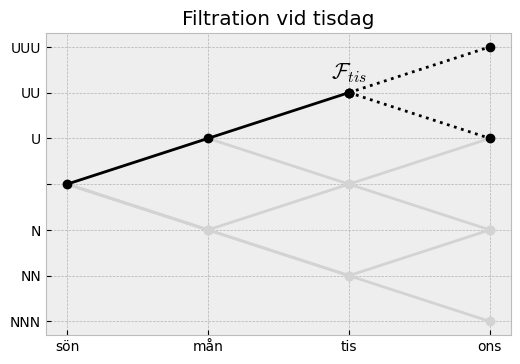

In [ ]:
dagar = ['sön','mån','tis','ons']

plt.plot(dagar,[0,1,0,-1], marker='o', color = 'lightgrey')
plt.plot(dagar,[0,-1,0,1], marker='o', color = 'lightgrey')
plt.plot(dagar,[0,-1,-2,-1], marker='o', color = 'lightgrey')
plt.plot(dagar,[0,-1,-2,-3], marker='o', color = 'lightgrey')

plt.plot(dagar[:3],[0,1,2], marker='o', color = 'black')
plt.plot(dagar[2:4],[2,1],':', marker='o', color = 'black')
plt.plot(dagar[2:4],[2,3],':', marker='o', color = 'black')
plt.yticks([-3,-2,-1,0,1,2,3],['NNN','NN','N','', 'U','UU','UUU'])
plt.title("Filtration vid tisdag")
plt.text(2, 2.3, r"$\mathcal{F}_{tis}$",
         fontsize=16, horizontalalignment='center')
plt.show()

$$\mathcal{F}_{\text{tis}}=2^\Omega\backslash \{\{Upp, Upp, Upp\},\{Upp, Upp, Ned\}\}$$

### 2.2.4 Martingales $

Givet vår probability space $(\Omega, \mathcal{F}, P)$, så är det viktigt att förstå att vår probability function $P$ i praktiken blir okänd. Men vi kan bygga upp den med antaganden om hur vi ser saker fungera. För att urskilja, och följa praxis, kommer vi studera riskneutrala $Q$ som vår probability function.

En $Q$ martingale är probability function på en stokastisk process som följer att väntevärdet under $Q$ är processen är densamma som det senast kända värdet: 

$$E^Q[X_{t}|X_s] = X_s : s\leq t$$

Minns du efficient market theorem? Var det inte ungefär det vi sa? Dagens värde på aktien en aktie är bästa gissningen för morgondagens värde. Med det så är bästa skattningen på sannolikhetsfunktionen $P$, att den sammanfaller med $=Q$! När det endast finns ett unikt sådant $Q$ på en arbitragefri marknad så betecknar man det som en *complete market*.  

Notera att betinga med $X_s$ är i vår modell densamma som att betinga med $\mathcal{F}_s$.

### 2.2.5 Random Walk $

Vi Random walk som bygger på stokastisk process $\{S_n\}^T_{n=0}$ och ser processen som en kedja av steg med markovegenskaper. 

För en aktiekurs modellerar vi stokastiska processen som en $Q$ Martingale med en viss volatilitet.

$$E^Q[X_{t}|\mathcal{F}_s]=X_n : s\leq t.$$

$$Var^Q[X_t|\mathcal{F}_s]=\sigma^2(t-s)$$





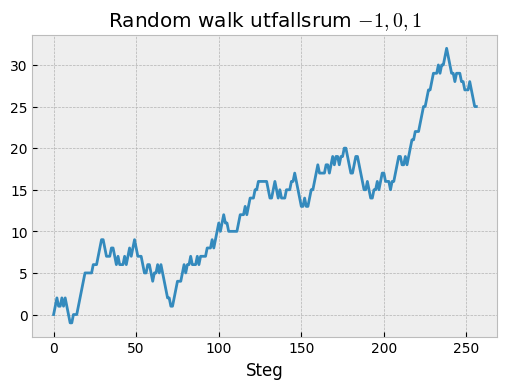

In [ ]:
X = [0] # start
for i in range(256):
    X.append(int(X[-1]+np.random.randint(-1,2))) # slump -1, 0 eller +1
plt.plot(X)
plt.title("Random walk utfallsrum $-1, 0, 1$")
plt.xlabel("Steg")
plt.show()

Random walks kan formuleras i kontinuerligt tid och i högre dimensioner, vilket då kallas *Wiener Processes*, eller *Brownian Motion*. Visst låter det kul? Går att läsa mer om [här](https://).

### 2.2.6 Black-Scholes $

Black-Scholes prissätter European Call Option från en analytisk härledning från en modell av derivatet som $\text{max}\{S-K, 0\}$ där $S$ följer den stokastiska process som beskrivits ovan. Brasklappen som ska läggas till är att vi har byggt vår modell av marknaden i diskret tid, medan BS antar kontinuerlig $t$. Skillnaden är att Random walk då kan beskrivas som en differentialekvation som underlättar den analytiska härledningen. 

En differentialekvation som 1997 ledde till att nobelpris i ekonomi (jaja, i Alfreds minne om man man ska vara precis). Här är den i sin helhet:

$$ \frac{\partial V}{\partial t} +\frac{1}{2} \sigma^2S^2\frac{\partial^2 V}{\partial S^2} +rS\frac{\partial V}{\partial S} - rV = 0 $$

Där $V$ är värdet på köpoptionen i sig. Som i sin tur kan lösas analytiskt till:


$$BS(S_0, K, T, \sigma, r) = \overbrace{\Phi(d_1 )S_0}^{\text{Förväntad}\atop  \text{avkastning}} - \underbrace{\Phi(d_2) \cdot e^{-rT}K}_{\text{Förväntad kostnad} \atop \text{med diskontenring (PV)}} $$

där $\Phi$ är normalfördelningsfunktion $\sim N(0,1)$.  $d_1$ och $d_2$ ges av:

$$d_1 = \frac{\overbrace{ln\frac{S_0}{K}}^\text{Värde}+\overbrace{(r+\frac{\sigma^2}{2})T}^{\text{Väntevärde}}}{\underbrace{\sigma \sqrt{T}}_{\text{ Standardavvikelse}}}  \text{   }  ;  d_2 = \frac{ln\frac{S_0}{K}+{(r-\frac{\sigma^2}{2})T}}{{\sigma \sqrt{T}}}$$

*Beviset lämnas åt läsaren.*

Okej okej, se det inte som att vi sopar bevisen under mattan, utan att vi sparar det härliga till `SF2701 Financial Mathematics` då allt detta gås igenom på riktigt.


Utseendet på $d_1$ och $d_2$ härstämmar från $z = \frac{x-\mu}{\sigma} \sim N(0,1)$. Black scholes-modellen antar att de historiska och framtida priserna kommer följa en normalfördelning. $d_1$ tar fram $z$-värdet som ger en sannolikhetsvikt på väntevärdet på priset efter löptiden $T$. $d_2$ viktar sannolikheten att det framtida priset kommer att överstiga $K$ och den "kostnaden" som uppstår av den riskfria räntan - sannolikheten att köptoptionen generar en vinst efter tiden $T$ med andra ord. Väntevärdet i formeln är härstämmar från väntevärdet hos en log-normalfördelningen i kontinuerlig tid för stokastiska processer.

